In [17]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Function to fetch historical stock prices
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Simulate stock price data using yfinance
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'
stock_prices = get_stock_data(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [26]:
stock_prices.tail()

Date
2023-12-11    193.179993
2023-12-12    194.710007
2023-12-13    197.960007
2023-12-14    198.110001
2023-12-15    197.570007
Name: Adj Close, dtype: float64

In [19]:
# Calculate daily returns
returns = stock_prices.pct_change().dropna()


In [29]:
returns

Date
2023-01-04    0.010314
2023-01-05   -0.010605
2023-01-06    0.036794
2023-01-09    0.004089
2023-01-10    0.004456
                ...   
2023-12-11   -0.012927
2023-12-12    0.007920
2023-12-13    0.016691
2023-12-14    0.000758
2023-12-15   -0.002726
Name: Adj Close, Length: 240, dtype: float64

In [20]:
# Calculate cumulative returns
cumulative_returns = np.cumsum(returns)


In [28]:
cumulative_returns 

Date
2023-01-04    0.010314
2023-01-05   -0.000290
2023-01-06    0.036504
2023-01-09    0.040593
2023-01-10    0.045049
                ...   
2023-12-11    0.459949
2023-12-12    0.467869
2023-12-13    0.484560
2023-12-14    0.485318
2023-12-15    0.482592
Name: Adj Close, Length: 240, dtype: float64

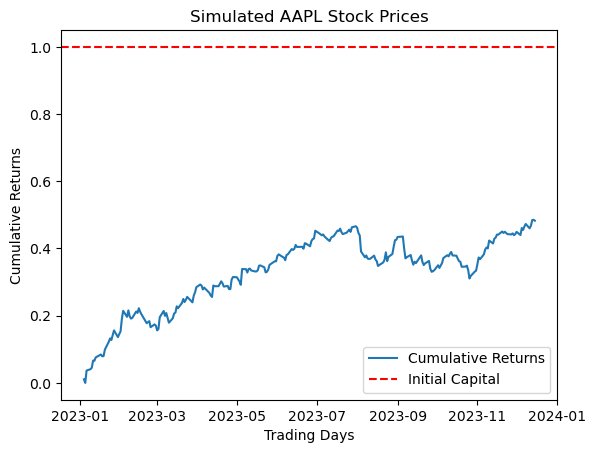

In [21]:
# Plot the simulated stock prices with axhline
fig, ax = plt.subplots()
ax.plot(cumulative_returns, label='Cumulative Returns')
ax.axhline(y=1.0, color='r', linestyle='--', label='Initial Capital')

ax.set_title(f'Simulated {ticker} Stock Prices')
ax.set_xlabel('Trading Days')
ax.set_ylabel('Cumulative Returns')
ax.legend()
plt.show()

In [22]:
# Function to simulate a trading strategy
def trading_strategy(cumulative_returns):
    capital = 10000  # initial capital
    position = 0  # initial position

    for return_today in returns:
        # Implement your trading strategy here (for simplicity, buy and hold)
        position += return_today

    final_portfolio_value = capital * (1 + position)
    return final_portfolio_value

# Simulate multiple runs of the trading strategy
num_simulations = 1000
final_portfolio_values = [trading_strategy(cumulative_returns) for _ in range(num_simulations)]



In [27]:
final_portfolio_values

[14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981742346,
 14825.922981

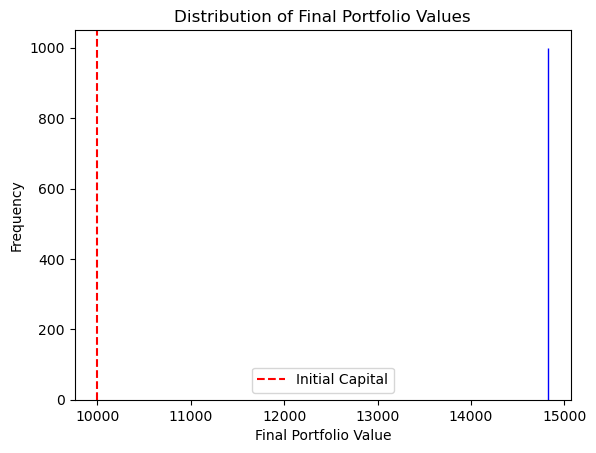

In [24]:
# Plot the distribution of final portfolio values with axhline
fig, ax = plt.subplots()
ax.hist(final_portfolio_values, bins=30, edgecolor='blue')
ax.axvline(x=10000, color='r', linestyle='--', label='Initial Capital')

ax.set_title('Distribution of Final Portfolio Values')
ax.set_xlabel('Final Portfolio Value')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()